### ***1. Import package***

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import misc
import pandas as pd
import cv2 as cv
%matplotlib inline

### ***2. Import midWest Mask-ID: Cut NorthAmerica maskID by midWest polygon***
> ***Import data - Extract data - Save data***  


array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

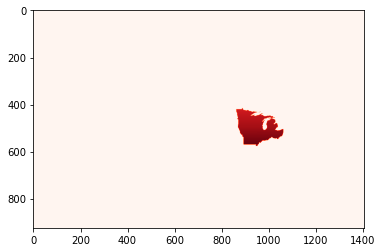

In [2]:
# import midWest maskID file #
midWest_maskNAID = cv.imread ("./misWest8state_maskID_NA.tif",2)  # NA: North American
plt.imshow (midWest_maskNAID,cmap = plt.cm.Reds)
midWest_maskNAID

In [3]:
# Extract value #
# Layer 1: maskID, start form 1 on left-upper conner to right-buttom #
midWt_maskNAID = midWest_maskNAID[midWest_maskNAID!=-9999.0]      # Gridcell outside midWest set as: -9999
# Layer 2: location index for each maskID #
midW_NAloc = np.where(midWest_maskNAID!=-9999.0)  # two arrry, first one is row index; second is column index
midWt_maskNAID


array([259291., 260060., 260061., ..., 365254., 365255., 365256.],
      dtype=float32)

In [4]:
midW_NAloc

(array([415, 416, 416, ..., 575, 575, 575], dtype=int64),
 array([886, 886, 887, ..., 949, 950, 951], dtype=int64))

In [5]:
# Svae data #
# Create a DataFrame to save midWest data (Output dataframe)#
midWestNA = pd.DataFrame()
midWestNA['row_idx'] = midW_NAloc[0]   # get row index of each maskID
midWestNA['col_idx'] = midW_NAloc[1]   # get col index of each maskID
midWestNA['grid_NA'] = np.int32(midWt_maskNAID)  # get maskID#

# Print data #
midWestNA

,row_idx,col_idx,grid_NA
0,415,886,259291
1,416,886,260060
2,416,887,260061
3,416,888,260062
4,416,889,260063
...,...,...,...
18774,575,947,365252
18775,575,948,365253
18776,575,949,365254
18777,575,950,365255


### ***3. Extract DLEM Result by maskID***  
* *Use Area data(.bin) as example here: Each Gird has a value in NorthAmerican, but we only need midwest value*

In [40]:
import os
import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import misc
import pandas as pd
import cv2 as cv
import fnmatch

In [45]:

def get_filename(path='D:/clu_workfolder/yzhang/ppt/'):
    filenames=[]
    name_pattern = 'y*.bin'
#     name_pattern = '*.tif'
    for filename in os.listdir(path):
        if fnmatch.fnmatch(filename, name_pattern):
            filenames.append(path+filename)

    return filenames

In [50]:
# Import area data(.bin) file #
def read_ppt(filename):
    try:
        dt      = np.dtype('float32')
    ppt_data = np.fromfile(filename, dtype=dt)
    except IOError:
        print("Error while opening the file!")

    # Reshaope data to target dimensions# 
    ppt = ppt_data.reshape(365,924,1404)      # change to the dimensions as NorthAmerican maskID size #
    
    return ppt

In [47]:
import numpy as np
def monthly_avg(newppt):
    months = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
    monthlyppt = []
    for month_idx in range(len(months)):
        first_idx = months[0:month_idx].sum()
        last_idx  = months[0:month_idx+1].sum()
        pptmw = newppt[first_idx:last_idx].sum()/18779
        monthlyppt.append(pptmw)

    monthlyppt = np.array(monthlyppt)
    return monthlyppt

In [53]:
filenames = get_filename()
for filename in filenames:
    print(filename)
    ppt = read_ppt(filename)
    newppt = ppt[:,midWestNA['row_idx'],midWestNA['col_idx']]
    print(monthly_avg(newppt))

D:/clu_workfolder/yzhang/ppt/y2000.bin
[ 29.1107121   44.36106156  39.44022911  51.74512421  97.60557671
 140.70510943 103.44442595  87.13845918  77.8214628   47.64715906
  67.00220326  39.03874341]
D:/clu_workfolder/yzhang/ppt/y2001.bin
[ 33.15270382  54.56912975  27.14045609  86.5552146  122.80032217
 110.29895096  82.41604319  89.28114516  77.6087518   92.8085561
  55.75910259  44.50133127]
D:/clu_workfolder/yzhang/ppt/y2002.bin
[ 31.24894164  33.73416449  62.12764258 101.80966106 130.15706374
  96.19212285 100.88507109 108.91754087  62.2848461   75.83267213
  23.5687703   34.4752616 ]
D:/clu_workfolder/yzhang/ppt/y2003.bin
[ 18.27834616  36.93910419  45.77487153  75.94859284 115.95021034
  92.14452314 103.40039406  72.65070691  85.20602135  41.48995886
  77.10200889  48.7971737 ]
D:/clu_workfolder/yzhang/ppt/y2004.bin
[ 42.57373596  28.47371399  81.29240109  52.90710368 164.11009638
  82.46600591 106.40588556  97.93025454  56.98807844  84.25593748
  73.04242771  37.98207439]
D:/clu

In [ ]:
newppt = ppt[:,midWestNA['row_idx'],midWestNA['col_idx']]
newppt.shape

In [36]:

monthly_avg(newppt)

array([ 42.57373596,  28.47371399,  81.29240109,  52.90710368,
       164.11009638,  82.46600591, 106.40588556,  97.93025454,
        56.98807844,  84.25593748,  73.04242771,  37.98207439])

In [ ]:
# Plot result #
plt.imshow(area,cmap=plt.cm.Greens)

# Extract area data with midwest maskID #
midWestNA['area'] = 'NA'             # Add a new variable to Output dataFrame #
for rows in range(midWestNA.shape[0]):  # for all Grid(18778 total) in midWest #
    midWestNA.loc[rows,'area'] = area[midWestNA.loc[rows,'row_idx'],midWestNA.loc[rows,'col_idx']]

midWestNA

******

In [20]:
midWest_maskNAID!=-9999.0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
area_data.shape

(1297296,)

In [41]:
a = [1,2,3,]


In [45]:
a[0:0]

[]

In [58]:
a = np.random.rand(100)
type(a)
a.reshape(12,-1)

array([[0.8136024 , 0.21613695, 0.54254222, 0.22079315, 0.71085395,
        0.52026783, 0.39438717, 0.23296249, 0.2752297 , 0.45891124],
       [0.07142656, 0.49166177, 0.40695281, 0.57429821, 0.39215411,
        0.46063779, 0.5354267 , 0.28852107, 0.74854033, 0.56747295],
       [0.90029671, 0.80038977, 0.64550507, 0.29068679, 0.29431847,
        0.09042164, 0.564354  , 0.41137306, 0.61236945, 0.92816231],
       [0.16537731, 0.90655182, 0.60946679, 0.22017885, 0.93033281,
        0.15006834, 0.69978273, 0.56253248, 0.54067215, 0.32173811],
       [0.86430982, 0.19007597, 0.28141143, 0.07552155, 0.31097391,
        0.24050013, 0.40148178, 0.51154821, 0.15943014, 0.44971752],
       [0.88678537, 0.68838617, 0.32274905, 0.64218405, 0.83778626,
        0.65048854, 0.36105236, 0.97343377, 0.32692656, 0.85176244],
       [0.40556612, 0.80837552, 0.14822884, 0.44561146, 0.53684656,
        0.6212967 , 0.0170269 , 0.40555306, 0.39836889, 0.82945625],
       [0.81707565, 0.54903274, 0.9424669